

# Investigating GDP, child mortality, and female education around the globe using the Gapminder datasets. 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, we've been asked to perform exploratory data analysis using NumPy and Pandas and to use data visualization as a means to display some possible relationships among the datasets. These are only qualitative findings as they are not supported with any inferential statitics. But they provide an important first glance into the datasets and may provide strong foundation for future exploration and hypothesis testing. 

I chose to explore the Gapminder datasets. I chose three indicator datasets which I explore below. These are:
1. Child mortality rate (child mortality of ages 0-5 dying per 1000 born)
2. GDP per capita (Income per person adjusted for inflation)
3. Education of women (average number of years of schooling women have had by the age range 35-44 years)

I chose these datasets because I wanted to explore questions relating to the education rate of women around the world and how it relates to infant and child health and GDP? I chose the age range of 35-44 years because by the age of 35 most women around the world have already had at least 1 baby if not have at least 1 child who has already reached the age of 5. 

I will explore three primary questions. These are:  

1. Which countries are in the low range, which countries are in the high range? 
> Which countries have highest GDP, lowest GDP?  
> Which coutries have most educated women, least educated women?   
> Which countries have highest child mortality, lowest child mortality?   

2. Where have there been increases, where have these indicators been stagnant?
> Where has GDP increased the most since 1970? Where has GDP growth been stagnant?  
> Where has child mortality decreased the most since 1970? Where has child mortality been stagnant?  
> Where has education rate of women increased the most since 1970? Where has it been stagnant?   

3. What is the child mortality rate like in countries with highly educated women compared to those with uneducated women? 
> Do wealthier countries have more highly educated women?  
> Do wealthier countries have lower child mortality?  
> Do highly educated women have healthier babies/children?   

Importantly, these data may have been updated by other sources but for consistency I chose a terminal year of 2015 for all datasets to make sure comparisons are comparable. 

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 4000

In [261]:
# Load data and print out a few lines. Perform operations to inspect data
school = pd.read_csv('mean_years_in_school_women_35_to_44_years.csv')
M = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')
inc = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')


In [262]:
school.head(5)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.15,0.16,0.16,0.17,0.18,0.18,0.19,0.20,0.20,...,0.54,0.56,0.58,0.60,0.62,0.64,0.67,0.69,0.71,0.74
1,Albania,5.04,5.16,5.29,5.43,5.56,5.70,5.83,5.97,6.12,...,10.50,10.70,10.80,11.00,11.20,11.30,11.50,11.70,11.80,12.00
2,Algeria,1.01,1.05,1.08,1.12,1.16,1.20,1.24,1.29,1.33,...,3.36,3.46,3.56,3.67,3.77,3.88,3.99,4.10,4.21,4.33
3,Andorra,6.68,6.83,6.98,7.14,7.29,7.45,7.61,7.77,7.93,...,12.60,12.70,12.90,13.00,13.20,13.30,13.50,13.60,13.80,13.90
4,Angola,1.12,1.16,1.20,1.24,1.28,1.32,1.36,1.41,1.45,...,3.50,3.60,3.71,3.81,3.92,4.03,4.14,4.26,4.37,4.49


In [263]:
M.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,94.1,90.2,86.4,82.8,79.3,76.1,73.2,70.4,68.2,65.9
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,17.2,16.6,16.0,15.4,14.9,14.4,14.0,13.5,13.3,12.9
2,Algeria,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,28.3,27.3,26.6,26.1,25.8,25.6,25.5,25.2,23.9,23.1
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.4,3.3,3.2,3.1,3.0,2.9,2.8,2.7,NaN,NaN
4,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,128.0,119.0,111.0,104.0,96.8,91.2,86.5,82.5,83.1,81.6


In [264]:
inc.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


**What are the dimensions of each?**

In [265]:
school.shape

(187, 47)

In [266]:
M.shape

(193, 220)

In [267]:
inc.shape

(193, 242)

**Looks like there are some inconsistences in total years (columns) in each dataset as well as the the countries (rows). Now check to see if there are any missing values?**
https://stackoverflow.com/questions/43427564/display-all-informations-with-data-info-in-python

In [268]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 47 columns):
country    187 non-null object
1970       187 non-null float64
1971       187 non-null float64
1972       187 non-null float64
1973       187 non-null float64
1974       187 non-null float64
1975       187 non-null float64
1976       187 non-null float64
1977       187 non-null float64
1978       187 non-null float64
1979       187 non-null float64
1980       187 non-null float64
1981       187 non-null float64
1982       187 non-null float64
1983       187 non-null float64
1984       187 non-null float64
1985       187 non-null float64
1986       187 non-null float64
1987       187 non-null float64
1988       187 non-null float64
1989       187 non-null float64
1990       187 non-null float64
1991       187 non-null float64
1992       187 non-null float64
1993       187 non-null float64
1994       187 non-null float64
1995       187 non-null float64
1996       187 non-null float64


In [269]:
M.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 220 columns):
country    193 non-null object
1800       184 non-null float64
1801       184 non-null float64
1802       184 non-null float64
1803       184 non-null float64
1804       184 non-null float64
1805       184 non-null float64
1806       184 non-null float64
1807       184 non-null float64
1808       184 non-null float64
1809       184 non-null float64
1810       184 non-null float64
1811       184 non-null float64
1812       184 non-null float64
1813       184 non-null float64
1814       184 non-null float64
1815       184 non-null float64
1816       184 non-null float64
1817       184 non-null float64
1818       184 non-null float64
1819       184 non-null float64
1820       184 non-null float64
1821       184 non-null float64
1822       184 non-null float64
1823       184 non-null float64
1824       184 non-null float64
1825       184 non-null float64
1826       184 non-null float64

In [270]:
inc.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 242 columns):
country    193 non-null object
1800       193 non-null int64
1801       193 non-null int64
1802       193 non-null int64
1803       193 non-null int64
1804       193 non-null int64
1805       193 non-null int64
1806       193 non-null int64
1807       193 non-null int64
1808       193 non-null int64
1809       193 non-null int64
1810       193 non-null int64
1811       193 non-null int64
1812       193 non-null int64
1813       193 non-null int64
1814       193 non-null int64
1815       193 non-null int64
1816       193 non-null int64
1817       193 non-null int64
1818       193 non-null int64
1819       193 non-null int64
1820       193 non-null int64
1821       193 non-null int64
1822       193 non-null int64
1823       193 non-null int64
1824       193 non-null int64
1825       193 non-null int64
1826       193 non-null int64
1827       193 non-null int64
1828       193 non-null

**Looks like there are also some missing values. Let's check to make sure the datatype are ok.** 

In [271]:
inc.dtypes

country    object
1800        int64
1801        int64
1802        int64
1803        int64
1804        int64
1805        int64
1806        int64
1807        int64
1808        int64
1809        int64
1810        int64
1811        int64
1812        int64
1813        int64
1814        int64
1815        int64
1816        int64
1817        int64
1818        int64
1819        int64
1820        int64
1821        int64
1822        int64
1823        int64
1824        int64
1825        int64
1826        int64
1827        int64
1828        int64
1829        int64
1830        int64
1831        int64
1832        int64
1833        int64
1834        int64
1835        int64
1836        int64
1837        int64
1838        int64
1839        int64
1840        int64
1841        int64
1842        int64
1843        int64
1844        int64
1845        int64
1846        int64
1847        int64
1848        int64
1849        int64
1850        int64
1851        int64
1852        int64
1853        int64
1854      

In [272]:
M.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
1804       float64
1805       float64
1806       float64
1807       float64
1808       float64
1809       float64
1810       float64
1811       float64
1812       float64
1813       float64
1814       float64
1815       float64
1816       float64
1817       float64
1818       float64
1819       float64
1820       float64
1821       float64
1822       float64
1823       float64
1824       float64
1825       float64
1826       float64
1827       float64
1828       float64
1829       float64
1830       float64
1831       float64
1832       float64
1833       float64
1834       float64
1835       float64
1836       float64
1837       float64
1838       float64
1839       float64
1840       float64
1841       float64
1842       float64
1843       float64
1844       float64
1845       float64
1846       float64
1847       float64
1848       float64
1849       float64
1850       float64
1851       f

In [273]:
school.dtypes

country     object
1970       float64
1971       float64
1972       float64
1973       float64
1974       float64
1975       float64
1976       float64
1977       float64
1978       float64
1979       float64
1980       float64
1981       float64
1982       float64
1983       float64
1984       float64
1985       float64
1986       float64
1987       float64
1988       float64
1989       float64
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
dtype: object

**These datatypes are ok by my standards. Ints and floats, while not the same, are fine for data visualization.**

**Last, let's check to make sure there are no duplicated countries in each dataset**

In [274]:
M.duplicated('country').sum()

0

In [275]:
school.duplicated('country').sum()

0

In [276]:
inc.duplicated('country').sum()

0

**Ok. No duplicated country names. That's good. We can now data clean.**

### Data Cleaning 
Here the data need to be cleaned and wrangled. 
1. Make sure countries are consistent with each other.   
2. The years need to be made consistent.   
3. Any missing values need to be imputed.  

**1. Make sure the datsets contain the same countries** 

In [277]:
school['country'].nunique()

187

In [278]:
M['country'].nunique()

193

In [279]:
inc['country'].nunique()

193

**Looks like there's some inconsistencies**  
 Filter out the countries from `M` and `inc` that are not in the `school` df. 
 
 Use these resources:
>https://stackoverflow.com/questions/38516664/anti-join-pandas  
>https://stackoverflow.com/questions/12065885/filter-dataframe-rows-if-value-in-column-is-in-a-set-list-of-values

In [280]:
#these are the countries in the M df that are not in the school df
m1 = set(M.country).difference(school.country)
m1

{'Monaco', 'Nauru', 'Palau', 'San Marino', 'St. Kitts and Nevis', 'Tuvalu'}

Check to make sure that the difference between `M` and `school` (as shown above) is the same thing as between `inc` and `school`.

In [281]:
m2 = set(inc.country).difference(school.country)
m1 == m2

True

Both `M` and `inc` have the same extra countries. So just use the countries in `school` to filter countries in `M` and `inc`. 

In [282]:
inc = inc[inc['country'].isin(school['country'])]

In [283]:
M = M[M['country'].isin(school['country'])]

In [284]:
inc.shape

(187, 242)

In [285]:
M.shape

(187, 220)

**2. Now, make sure the years are the same among all datasets.**
I'll select from 1970 to 2015 because all of those years are in all three datasets. I will only need to filter `inc` and `M`. To do this I will use the columns that are in school as a filter for columns in `M` and `inc`  


In [286]:
M = M.loc[:,list(school.columns)]
inc = inc.loc[:,list(school.columns)]

In [287]:
M.columns

Index(['country', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015'],
      dtype='object')

In [288]:
inc.columns

Index(['country', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015'],
      dtype='object')

**3.Now let's check on any null values.**

In [289]:
inc.isnull().any(axis=1).sum()

0

In [290]:
school.isnull().any(axis=1).sum()

0

In [291]:
M.isnull().any(axis=1).sum()

1

**One row in M has null values. There are two options to deal with this**
> 1.Remove the row completely and then remove that country from inc and school  
> 2.Fill in the missing values using some method depending on where they are in the dataset. 

Let's try option 2 first. 

In [292]:
M[M.isnull().any(axis=1)]

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.7,3.6,3.5,3.4,3.3,3.2,3.1,3.0,2.9,2.8


Ok. It looks like it's the beginning of the dataset. So I will fill these values in with the mean values for years 1985,1986,1987.   
I used this resource: 
https://stackoverflow.com/questions/34913590/fillna-in-multiple-columns-in-place-in-python-pandas



In [293]:
mean = M[M.isnull().any(axis=1)].loc[:,['1985', '1986', '1987']].mean(axis=1)

new_and = M[M['country'] == 'Andorra'].apply(lambda x: x.fillna(mean))
M[M['country'] == "Andorra"] = new_and

Ok, let's check to make sure it worked. Now there should be no missing values in M...

In [294]:
M.isnull().any(axis=1).sum()

0

Andorra should have filled in values...

In [295]:
M[M['country'] == "Andorra"]

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3,Andorra,11.966667,11.966667,11.966667,11.966667,11.966667,11.966667,11.966667,11.966667,11.966667,...,3.7,3.6,3.5,3.4,3.3,3.2,3.1,3.0,2.9,2.8


<a id='eda'></a>
## Exploratory Data Analysis

We are now ready to explore the datasets. 

### Research Question 1: Which countries are in the low range, which countries are in the high range? 
> A. In 2015, which countries have highest GDP, lowest GDP?   
> B. In 2015, which countries have highest child mortality, lowest child mortality?  
> C. In 2015, which coutries have most educated women, least educated women?   


**A. Which countriest have highest and lowest GDP PPP**

[17178.716577540108, 10800.0]

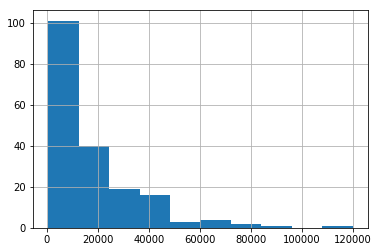

In [296]:
#first visualize the overal GDP in PPP for 2015
inc['2015'].hist();
#looks like it's a very right skewed distribution
[inc['2015'].mean(), inc['2015'].median()]

**The results of this histogram indicate that global GDP is right skewed which means that there is an unequal distribution of countries around mean GPD. Essentially, there are many more countries that have lower than average GDP. There appear to be a few outliers(80,000+) that causes the global average GDP (17,178) in 2015 to be higher than the median GDP (10,800). We will take a closer look at this distribution below. We will look at the lowest and highest countries in terms of GDP in 2015** 

In [297]:
#first figure out the 5 number summary for 2015 to make some bins
sum = inc['2015'].describe()
sum

count       187.000000
mean      17178.716578
std       19082.450381
min         623.000000
25%        3270.000000
50%       10800.000000
75%       24100.000000
max      120000.000000
Name: 2015, dtype: float64

In [298]:
#make bins
def make_bin_edges(x):
    min1 = x['min']-0.001
    low = (min1 + x['25%'])/2
    low_med = x['25%']
    med = x['50%']
    med_high = x['75%']
    high = (med_high + x['max'])/2
    highest = x['max']+0.001
    return [min1, low, low_med, med, med_high, high, highest]


bin_edges = make_bin_edges(sum)
bin_edges

bin_names = ['lowest', 'low', 'medium_low', 'medium', 'high', 'highest']


In [299]:
#add bins to the inc df
inc['levels2015'] = pd.cut(inc['2015'], bin_edges, labels=bin_names)

In [300]:
inc['levels2015'].head(5)

0        lowest
1        medium
2        medium
3          high
4    medium_low
Name: levels2015, dtype: category
Categories (6, object): [lowest < low < medium_low < medium < high < highest]

In [301]:
#select lowest countries and select highest countries
inc[inc['levels2015'] == 'lowest'].head(5)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,levels2015
0,Afghanistan,1180,1100,1050,1150,1180,1210,1240,1130,1190,...,1290,1300,1530,1610,1660,1840,1810,1780,1750,lowest
26,Burkina Faso,790,810,830,774,747,703,683,714,778,...,1300,1360,1350,1430,1470,1520,1520,1540,1550,lowest
27,Burundi,802,849,773,828,810,802,850,936,905,...,748,759,760,764,772,779,791,803,749,lowest
32,Central African Republic,1350,1270,1220,1240,1180,1170,1190,1250,1240,...,864,867,870,888,912,946,598,602,626,lowest
37,Comoros,1430,1460,1460,1530,1530,1580,1530,1530,1510,...,1450,1420,1420,1410,1420,1420,1440,1430,1410,lowest


In [302]:
inc[inc['levels2015'] == 'highest']

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,levels2015
24,Brunei,79300,83800,88700,93400,100000,96800,112000,120000,123000,...,84500,81900,79500,80600,82400,82000,79100,76100,74600,highest
97,Luxembourg,29600,30100,31800,34100,35300,32700,33300,33800,35100,...,97900,94900,89100,91700,92000,89500,91000,93800,95300,highest
138,Qatar,155000,156000,159000,161000,158000,156000,160000,142000,146000,...,119000,120000,117000,125000,129000,125000,123000,121000,120000,highest
150,Singapore,10300,11400,12700,13900,14500,14800,15600,16600,17800,...,68400,66000,63700,72100,75000,76000,78500,80300,80900,highest


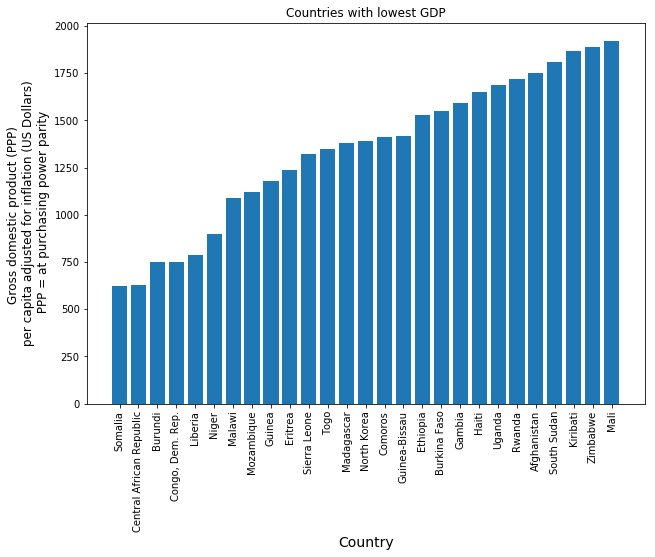

In [303]:
#visualize the lowest countries

#make a function to use in future plotting
def country_bar_plot(df, figx, figy, level_varname, level, sort_val, ylabel, title, rot_ticks= False):
    ''' makes a histogram of countries based on specified levels
    df= the pandas dataframe
    figz = figure size x dimension
    figy = figures size y dimension
    level_varname = string specifying the level variable to plot
    level = a string specifying the which level of countries i.e. highest, lowest, etc
    ylable = a string specifying the ylabel
    title = s string specifiying the title 
    
    >>> country_hist_plot(inc, 10, 7, 'levels2015', 'lowest', 'Gross domestic product (PPP) \n per capita adjusted for inflation (US Dollars) \n PPP = at purchasing power parity', 'Countries with lowest GDP', rot_ticks= True)
    '''
    
    plt.figure(figsize=(figx,figy))
    labels = df[df[level_varname] == level].sort_values(by=sort_val)['country']
       
    plt.bar(labels, df[df[level_varname] == level].sort_values(by=sort_val)[sort_val])
    
    if rot_ticks == True:
        plt.xticks(rotation=90)
            
    plt.xlabel('Country', fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title);

country_bar_plot(inc, 10, 7, 'levels2015', 'lowest', '2015','Gross domestic product (PPP) \n per capita adjusted for inflation (US Dollars) \n PPP = at purchasing power parity', 'Countries with lowest GDP', rot_ticks= True)    

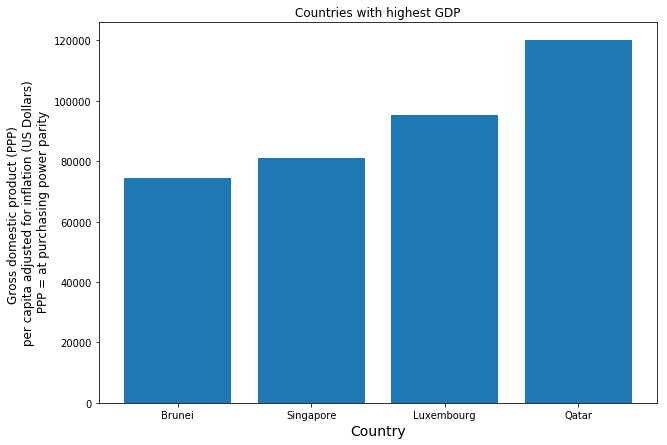

In [304]:
#visualize the highest countries
country_bar_plot(inc, 10, 7, 'levels2015', 'highest', '2015','Gross domestic product (PPP) \n per capita adjusted for inflation (US Dollars) \n PPP = at purchasing power parity', 'Countries with highest GDP', rot_ticks= False)    


**The results of these bar plots confirm my initial thoughts garnered from the histogram of overall GDP. There are many more countries classified within the lowest GDP bracket than in the highest GDP bracket. There are 27 countries in the lowest bracket (a large majority in Africa) and only 4 in the highest bracket. Both Brunei and Qatar are oil rich countries which puts them in this bracket.**

**B. Which countriest have highest and lowest child mortality rate?**

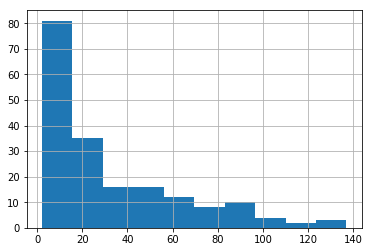

In [305]:
#first visualize the overal GDP in PPP for 2015
M['2015'].hist();
#looks like it's a very right skewed distribution

**This distribution is very right skewed also but this is a good thing to see. This means there are many more countries with very low child mortality than there are high child mortality. We will take a closer look at these data too see which countries are in the low end and which are in the high end.**

In [306]:
#Same procedure as above
#first figure out the 5 number summary for 2015 to make some bins
sum = M['2015'].describe()
sum

count    187.000000
mean      31.945989
std       31.618110
min        2.200000
25%        8.200000
50%       18.100000
75%       50.800000
max      137.000000
Name: 2015, dtype: float64

In [307]:
#make bins
bin_edges = make_bin_edges(sum)
bin_names = ['lowest', 'low', 'medium_low', 'medium', 'high', 'highest']
bin_edges

[2.1990000000000003, 5.1995, 8.2, 18.1, 50.8, 93.9, 137.001]

In [308]:
#add bins to the M df
M['levels2015'] = pd.cut(M['2015'], bin_edges, labels=bin_names)



In [309]:
#check to make sure every entry got a level
M['levels2015'].isnull().any().sum()

0

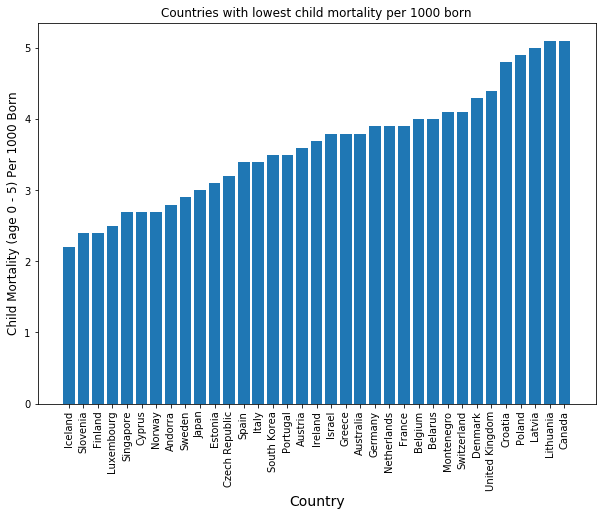

In [310]:
#visualize countries with lowest child mortality
country_bar_plot(M, 10, 7, 'levels2015', 'lowest','2015', 'Child Mortality (age 0 - 5) Per 1000 Born', 'Countries with lowest child mortality per 1000 born', rot_ticks= True)    



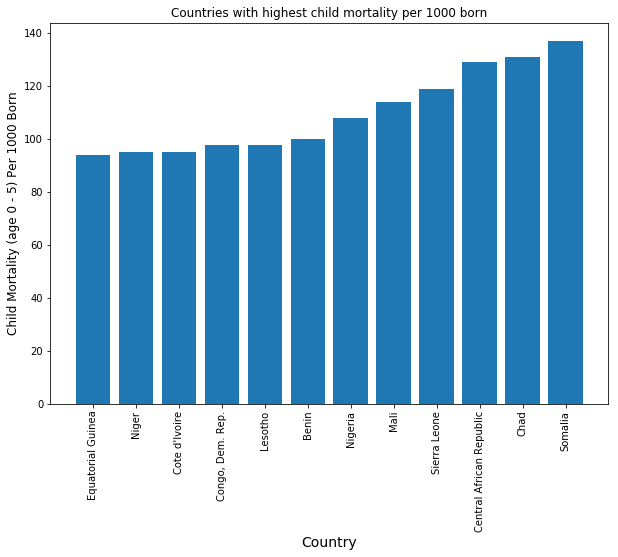

In [311]:
#visualize the highest 
country_bar_plot(M, 10, 7, 'levels2015', 'highest', '2015','Child Mortality (age 0 - 5) Per 1000 Born', 'Countries with highest child mortality per 1000 born', rot_ticks= True)    


**The results of these two bar plots are encouraging. There are many more countries that have low child mortality than do high (as inferred from the earlier histogram). All of the countries that have highest child mortality (depicted here) are also those that are within the lowest GDP bracket. All of these are in Africa, many of these have a long history of civil unrest. Many western and eastern European countries are among those with lowest child mortality. Interestingly, the United States is not among these. In 2016, the rate in the US was 6.6 which is wihtin the 'low' bracket.**

**C. Which countriest have most and least educated?**

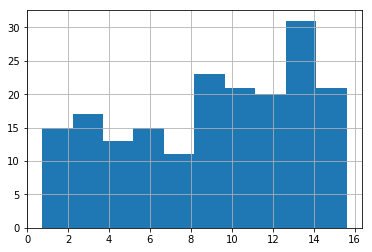

In [312]:
#first visualize the overal GDP in PPP for 2015
school['2015'].hist();


**This distribution is much different from the earlier two. It seems like there is a threshold around 8 years of education which is roughly from K - grade 8. Females either stop going to school here or generally continue on for several more years. Average education years is 13 which is roughly K - grade 12. In following bar plots we will explore which countries are on the low and which are on the high end of this distribution.**

In [313]:
#first figure out the 5 number summary for 2015 to make some bins
sum = school['2015'].describe()
sum

count    187.000000
mean       9.006845
std        4.295344
min        0.740000
25%        5.565000
50%        9.620000
75%       12.900000
max       15.600000
Name: 2015, dtype: float64

In [314]:
#make bins


bin_edges = make_bin_edges(sum)
bin_names = ['lowest', 'low', 'medium_low', 'medium', 'high', 'highest']
bin_edges

[0.739,
 3.1519999999999997,
 5.5649999999999995,
 9.62,
 12.9,
 14.25,
 15.600999999999999]

In [315]:
#add bins to the inc df
school['levels2015'] = pd.cut(school['2015'], bin_edges, labels=bin_names)

school['2015'].head(5)

0     0.74
1    12.00
2     4.33
3    13.90
4     4.49
Name: 2015, dtype: float64

In [316]:
#check to make sure every entry got a level
school['levels2015'].isnull().any().sum()

0

In [317]:
#select lowest countries and select highest countries
school[school['levels2015'] == 'lowest'].head(5)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,levels2015
0,Afghanistan,0.15,0.16,0.16,0.17,0.18,0.18,0.19,0.20,0.20,...,0.56,0.58,0.60,0.62,0.64,0.67,0.69,0.71,0.74,lowest
18,Benin,0.44,0.46,0.48,0.49,0.51,0.53,0.55,0.56,0.58,...,1.60,1.65,1.70,1.76,1.82,1.87,1.93,1.99,2.06,lowest
19,Bhutan,0.57,0.59,0.61,0.63,0.65,0.68,0.70,0.72,0.75,...,1.89,1.95,2.01,2.07,2.14,2.20,2.27,2.34,2.41,lowest
26,Burkina Faso,0.20,0.21,0.22,0.23,0.23,0.24,0.25,0.26,0.27,...,0.84,0.87,0.90,0.93,0.97,1.00,1.04,1.07,1.11,lowest
27,Burundi,0.65,0.67,0.70,0.72,0.75,0.77,0.80,0.83,0.85,...,2.26,2.33,2.40,2.48,2.55,2.63,2.71,2.79,2.88,lowest


In [318]:
school[school['levels2015'] == 'highest'].head(5)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,levels2015
15,Belarus,7.25,7.40,7.56,7.72,7.88,8.04,8.21,8.37,8.53,...,13.5,13.7,13.9,14.0,14.2,14.3,14.5,14.6,14.8,highest
30,Canada,9.39,9.58,9.77,9.96,10.20,10.30,10.50,10.70,10.90,...,14.7,14.8,14.9,15.1,15.2,15.3,15.4,15.5,15.6,highest
45,Czech Republic,7.49,7.65,7.81,7.98,8.14,8.31,8.48,8.64,8.81,...,13.3,13.4,13.5,13.7,13.8,13.9,14.1,14.2,14.3,highest
46,Denmark,8.22,8.38,8.54,8.71,8.87,9.04,9.21,9.37,9.54,...,14.0,14.1,14.2,14.4,14.5,14.6,14.8,14.9,15.0,highest
55,Estonia,7.27,7.43,7.59,7.75,7.92,8.08,8.25,8.41,8.58,...,13.5,13.6,13.8,13.9,14.1,14.2,14.3,14.5,14.6,highest


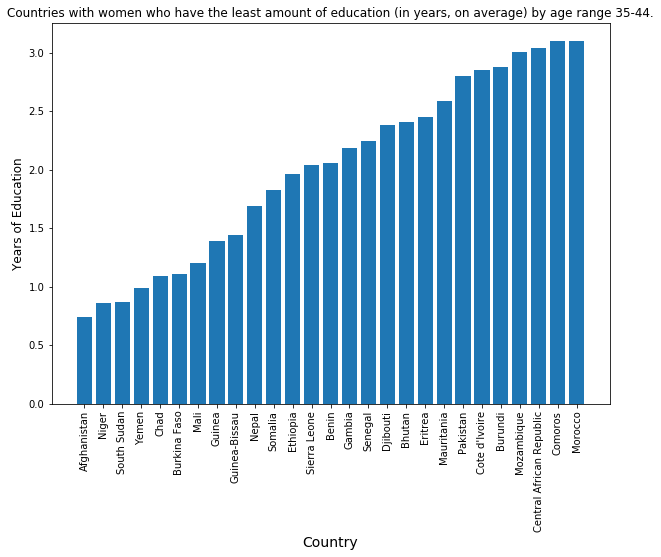

In [321]:
#visualize the lowest countries
country_bar_plot(school, 10, 7, 'levels2015', 'lowest', '2015','Years of Education', 'Countries with women who have the least amount of education (in years, on average) by age range 35-44.', rot_ticks= True)    


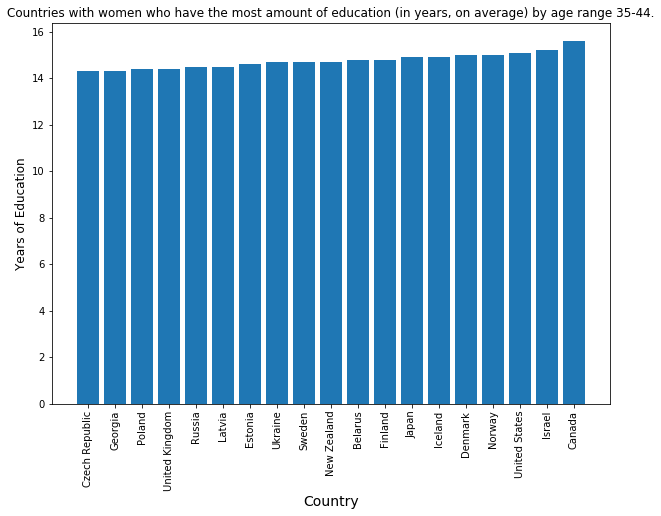

In [323]:
#visualize the highest countries
country_bar_plot(school, 10, 7, 'levels2015', 'highest', '2015', 'Years of Education', 'Countries with women who have the most amount of education (in years, on average) by age range 35-44.', rot_ticks= True)    


**Again, least educated females are from countries that also have low GDP- most from Africa. Highly educated females are from countires in Europe and North America (except for Mexico). Canada has the most educated females by the age of 35, on average. Females in this country have close to 16 years of education which is roughly K - 12 + 3-4 years of post-secondary school. These are data just for 2015 so let's see how these indicators have changed from 1970 to 2015**


### Research Question 2: Where have there been increases, where have these indicators been stagnant?
> A. Where has GDP increased the most since 1970? Where has GDP growth been stagnant?  
> B. Where has mortality rate decreased the most since 1970? Where has mortality rate been stagnant? Has there been an increase in mortality rate anywhere?  
> C. Where has education rate of women increased the most since 1970? Where has it been stagnant?   



**A. Where has GDP increased the most since 1970? Where has GDP growth been stagnant? Where has there been a decline?**

In [324]:
#make rate of increase column`
inc['rate'] = ((inc['2015']-inc['1970'])/inc['1970']) *100
#M['rate'] = ((M['2015']-M['1970'])/M['1970']) *100
#school['rate'] = ((school['2015']-school['1970'])/school['1970']) *100

In [325]:
sum = inc['rate'].describe()
sum

count     187.000000
mean      160.196880
std       264.111496
min       -79.483283
25%        45.547786
50%        97.540984
75%       187.027169
max      2265.217391
Name: rate, dtype: float64

In [326]:
#make bins, here we need to use a different function 
def make_bin_edges_rate(x):
    ''' x -> an array of floats'''
    
    if sum['min'] < 0:
        dec = sum['min']-0.001
        min1 = 0
    else: 
        min1 = sum['min']
    
    low = (min1 + x['25%'])/2
    low_med = x['25%']
    med = x['50%']
    med_high = x['75%']
    high = (med_high + x['max'])/2
    highest = x['max']+0.001
    return [dec, min1, low, low_med, med, med_high, high, highest]


bin_edges = make_bin_edges_rate(sum)
bin_names = ['decreasing', 'lowest', 'low', 'medium_low', 'medium', 'high', 'highest']
bin_edges

[-79.48428267477205,
 0,
 22.773892773892776,
 45.54778554778555,
 97.54098360655738,
 187.02716944044806,
 1226.1222803723979,
 2265.2183913043477]

In [327]:
#add bins to the inc df
inc['level_rate'] = pd.cut(inc['rate'], bin_edges, labels=bin_names)

inc['level_rate'].head(5)

0    medium_low
1          high
2    medium_low
3           low
4        lowest
Name: level_rate, dtype: category
Categories (7, object): [decreasing < lowest < low < medium_low < medium < high < highest]

In [328]:
inc[inc['level_rate'] == 'decreasing'].head(5)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,levels2015,rate,level_rate
24,Brunei,79300,83800,88700,93400,100000,96800,112000,120000,123000,...,79500,80600,82400,82000,79100,76100,74600,highest,-5.926860,decreasing
27,Burundi,802,849,773,828,810,802,850,936,905,...,760,764,772,779,791,803,749,lowest,-6.608479,decreasing
32,Central African Republic,1350,1270,1220,1240,1180,1170,1190,1250,1240,...,870,888,912,946,598,602,626,lowest,-53.629630,decreasing
37,Comoros,1430,1460,1460,1530,1530,1580,1530,1530,1510,...,1420,1410,1420,1420,1440,1430,1410,lowest,-1.398601,decreasing
38,"Congo, Dem. Rep.",2110,2210,2160,2270,2340,2050,1850,1790,1640,...,588,609,630,653,685,726,750,lowest,-64.454976,decreasing


In [329]:
#check to make sure every entry got a level
inc['level_rate'].isnull().any().sum()

0

In [330]:
#select lowest countries and select highest countries
inc[inc['level_rate'] == 'lowest'].head(5)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,levels2015,rate,level_rate
4,Angola,5550,5780,5670,6000,6060,5620,5200,5110,4720,...,5910,5900,5910,6000,6190,6260,6230,medium_low,12.252252,lowest
11,Bahamas,21200,21000,19900,21000,17100,14300,14800,15800,17700,...,22900,22900,22700,23000,22700,22300,21700,medium,2.358491,lowest
54,Eritrea,1090,1110,1120,1120,1090,1020,999,983,913,...,1410,1420,1510,1180,1160,1200,1240,lowest,13.761468,lowest
61,Gambia,1480,1600,1660,1680,1960,1780,1920,1960,1800,...,1600,1660,1540,1580,1600,1560,1590,lowest,7.432432,lowest
68,Guinea,963,975,976,1000,1050,1070,1160,1160,1170,...,1200,1190,1210,1230,1240,1210,1180,lowest,22.533749,lowest


In [331]:
inc[inc['level_rate'] == 'highest']

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,levels2015,rate,level_rate
35,China,851,879,846,898,892,924,896,909,1020,...,8650,9530,10400,11100,12000,12800,13600,medium,1498.119859,highest
53,Equatorial Guinea,1150,1040,899,936,991,1140,1270,1280,1380,...,38700,33700,34400,35600,32700,31200,27200,high,2265.217391,highest
156,South Korea,2080,2360,2680,3230,3570,3990,4470,4810,5210,...,28600,30400,31200,31800,32500,33400,34200,high,1544.230769,highest


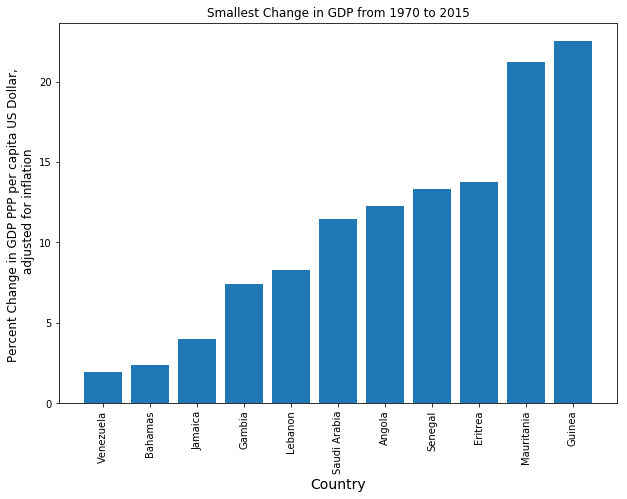

In [332]:
#visualize countries who have grown the least
country_bar_plot(inc, 10, 7, 'level_rate', 'lowest', 'rate', 'Percent Change in GDP PPP per capita US Dollar, \n adjusted for inflation', 'Smallest Change in GDP from 1970 to 2015', rot_ticks= True)    

**These countries have had the smallest change in GDP since 1970. In these cases these countries are closest to their GDP in 1970. Venezuela has had the smallest increase in GDP and they have been having civil unrest due to their devestating economic issues under the reign of Hugo Chavez and Nicolas Maduro.**

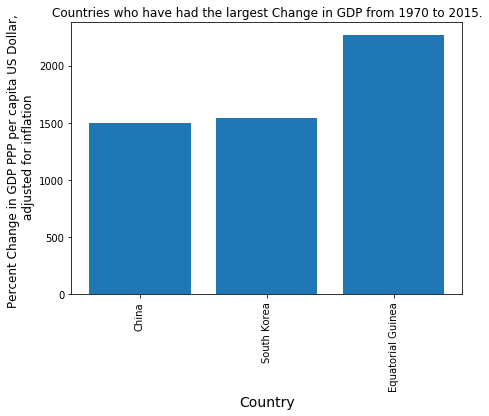

In [335]:
#visualize the countries who have grown the most
country_bar_plot(inc, 7, 5, 'level_rate', 'highest', 'rate', 'Percent Change in GDP PPP per capita US Dollar, \n adjusted for inflation', 'Countries who have had the largest Change in GDP from 1970 to 2015.', rot_ticks= True)    


**China, South Korea and Equatorial Guinea have grown the most in GDP**

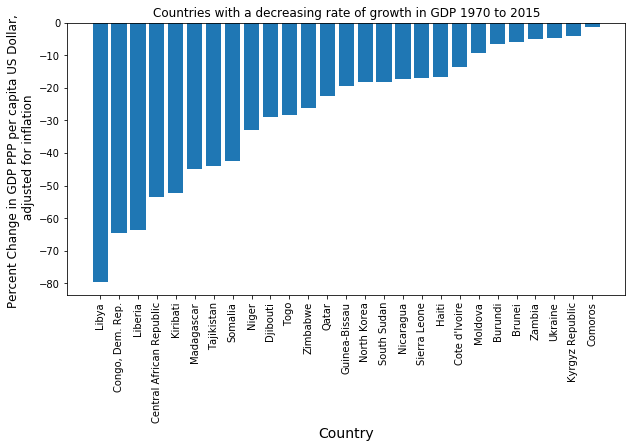

In [228]:

#visualize the countries decreasing
country_bar_plot(inc, 10, 5, 'level_rate', 'decreasing', 'rate', 'Percent Change in GDP PPP per capita US Dollar, \n adjusted for inflation', 'Countries with decreasing GDP since', rot_ticks= True)    


**Again, the GDP in many countries in Africa has declined since 1970. Most of these countries have gone through civil unrest, dictatorships, or environtmental disaster (i.e. Haiti).**

**B. Where has mortality rate decreased the most since 1970? Where has mortality rate been stagnant? Has there been an increase in mortality rate anywhere?**

In [229]:
#make rate of increase column`
M['rate'] = ((M['2015']-M['1970'])/M['1970']) *100

In [230]:
sum = M['rate'].describe()
sum

count    187.000000
mean     -77.129728
std       11.631910
min      -96.551724
25%      -86.339623
50%      -79.047619
75%      -70.404132
max      -41.363636
Name: rate, dtype: float64

In [231]:
#make bins
# here we will use the first make_bin_edge function

bin_edges=make_bin_edges(sum)
bin_names = ['highest', 'high', 'medium high', 'medium', 'medium_low', 'low']
bin_edges

[-96.55272413793104,
 -91.44617338972023,
 -86.33962264150944,
 -79.04761904761905,
 -70.40413163426169,
 -55.88388399894903,
 -41.36263636363637]

In [232]:
#add bins to the M df
M['level_rate'] = pd.cut(M['rate'], bin_edges, labels=bin_names)

M['level_rate'].head(5)

0        medium
1          high
2          high
3        medium
4    medium_low
Name: level_rate, dtype: category
Categories (6, object): [highest < high < medium high < medium < medium_low < low]

In [233]:
#check to make sure every entry got a level
M['level_rate'].isnull().any().sum()

0

In [234]:
#select countries with smallest decrease in mortality rate
M[M['level_rate'] == 'low'].head(5)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,levels2015,rate,level_rate
32,Central African Republic,220.0,215.0,210.0,205.0,201.0,197.0,194.0,191.0,187.0,...,153.0,149.0,145.0,141.0,138.0,134.0,129.0,highest,-41.363636,low
33,Chad,256.0,252.0,248.0,247.0,245.0,244.0,243.0,242.0,240.0,...,154.0,150.0,146.0,142.0,138.0,135.0,131.0,highest,-48.828125,low
48,Dominica,64.4,58.2,51.7,45.2,39.3,34.1,29.7,26.1,23.3,...,20.3,22.1,24.2,26.7,29.2,31.4,33.0,medium,-48.757764,low
70,Guyana,73.6,73.3,73.1,72.9,72.7,72.5,72.1,71.7,71.2,...,38.3,37.6,36.9,36.1,35.3,34.4,33.4,medium,-54.619565,low
93,Lesotho,178.0,174.0,169.0,165.0,160.0,155.0,149.0,143.0,137.0,...,103.0,99.7,98.0,97.6,98.5,98.3,97.9,highest,-45.000000,low


In [235]:
#select countries with largest decrease in mortality rate
M[M['level_rate'] == 'highest'].head(5)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,levels2015,rate,level_rate
44,Cyprus,35.1,33.4,31.8,30.3,28.8,27.4,26.1,24.8,23.6,...,3.8,3.6,3.4,3.2,3.0,2.9,2.7,lowest,-92.307692,highest
77,Iran,227.0,184.0,176.0,168.0,160.0,152.0,143.0,135.0,126.0,...,20.3,19.3,18.4,17.6,16.9,16.3,15.7,medium_low,-93.083700,highest
102,Maldives,261.0,251.0,240.0,229.0,217.0,205.0,194.0,184.0,174.0,...,14.5,13.2,12.0,11.0,10.2,9.5,9.0,medium_low,-96.551724,highest
127,Oman,229.0,217.0,204.0,192.0,180.0,169.0,157.0,145.0,134.0,...,11.8,11.7,11.5,11.4,11.2,11.0,10.9,medium_low,-95.240175,highest
137,Portugal,68.3,63.1,57.8,52.7,47.9,43.5,39.4,35.7,32.4,...,4.0,3.9,3.8,3.7,3.7,3.6,3.5,lowest,-94.875549,highest


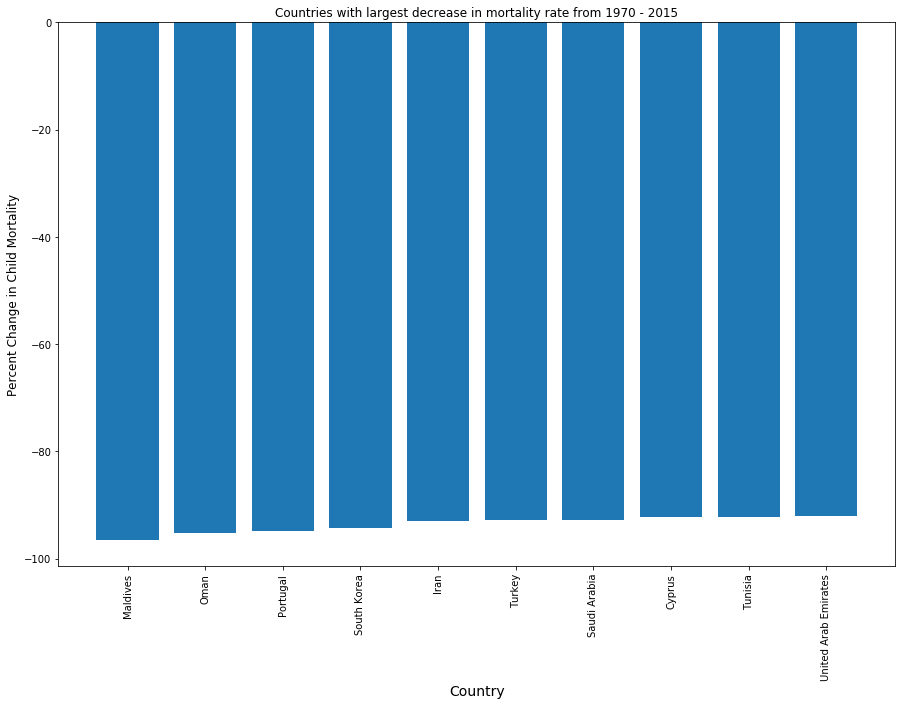

In [236]:
#visualize the largest decrease in mortality rate
country_bar_plot(M, 15, 10, 'level_rate', 'highest', 'rate', 'Percent Change in Child Mortality', 'Countries with largest decrease in mortality rate from 1970 - 2015', rot_ticks= True)    


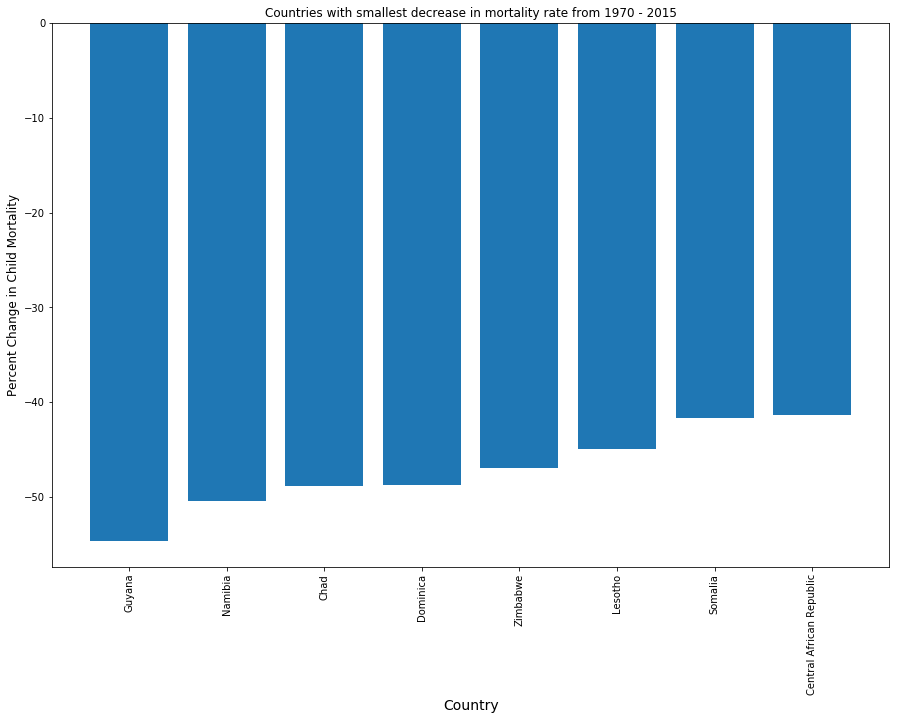

In [237]:
#visualize the smallest decrease in mortality rate
country_bar_plot(M, 15, 10, 'level_rate', 'low', 'rate', 'Percent Change in Child Mortality', 'Countries with smallest decrease in mortality rate from 1970 - 2015', rot_ticks= True)    


**Child mortality rate has greatly decreased in several countries since 1970 especially within the Middle East (Iran, Turkey, Saudi Arabia, UAE, Tunisia). However, still child mortality has not budged much in countries in Africa (i.e. Chad, Zimbabwe, Lesotho, Somalia). These countries still do have room for improvement (they are not at 0 child mortality rate).**

**C. Where has education rate of women increased the most since 1970? Where has it been stagnant?**

In [238]:
school['rate'] = ((school['2015']-school['1970'])/school['1970']) *100

In [239]:
sum = school['rate'].describe()
sum

count    187.000000
mean     229.370411
std      130.265639
min       34.821429
25%      119.052419
50%      189.171975
75%      319.602205
max      800.000000
Name: rate, dtype: float64

In [240]:
#make bins
#rate has increased so I can use the first make_bin_edges function

bin_edges=make_bin_edges(sum)
bin_names = ['lowest', 'low', 'medium_low', 'medium', 'high', 'highest']
bin_edges

[34.82042857142858,
 76.93642396313363,
 119.05241935483869,
 189.17197452229297,
 319.6022046489336,
 559.8011023244668,
 800.001]

In [241]:
#add bins to the school df
school['level_rate'] = pd.cut(school['rate'], bin_edges, labels=bin_names)
school['level_rate'].head(5)

0          high
1    medium_low
2          high
3           low
4        medium
Name: level_rate, dtype: category
Categories (6, object): [lowest < low < medium_low < medium < high < highest]

In [242]:
#check to make sure every entry got a level
school['level_rate'].isnull().any().sum()

0

In [243]:
#select lowest countries and select highest countries
school[school['level_rate'] == 'lowest']

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,levels2015,rate,level_rate
30,Canada,9.39,9.58,9.77,9.96,10.2,10.3,10.5,10.7,10.9,...,14.9,15.1,15.2,15.3,15.4,15.5,15.6,highest,66.134185,lowest
178,United States,11.20,11.40,11.50,11.60,11.8,11.9,12.0,12.1,12.2,...,14.4,14.5,14.6,14.7,14.8,14.9,15.1,highest,34.821429,lowest


In [244]:
school[school['level_rate'] == 'highest']

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,levels2015,rate,level_rate
77,Iran,0.99,1.04,1.09,1.14,1.20,1.27,1.34,1.41,1.49,...,6.33,6.49,6.65,6.81,6.97,7.13,7.29,medium_low,636.363636,highest
78,Iraq,1.02,1.07,1.12,1.18,1.24,1.30,1.37,1.45,1.52,...,5.85,6.00,6.15,6.30,6.45,6.61,6.76,medium_low,562.745098,highest
171,Tunisia,0.83,0.87,0.91,0.96,1.01,1.06,1.12,1.18,1.24,...,5.68,5.84,6.00,6.16,6.32,6.48,6.64,medium_low,700.000000,highest
184,Yemen,0.11,0.11,0.12,0.12,0.13,0.13,0.14,0.15,0.15,...,0.78,0.81,0.84,0.88,0.91,0.95,0.99,lowest,800.000000,highest


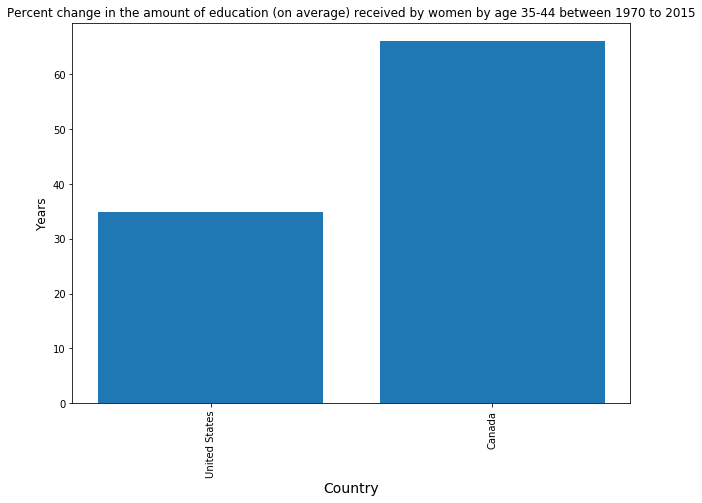

In [246]:
#visualize the lowest growth in education rate
country_bar_plot(school, 10, 7, 'level_rate', 'lowest', 'rate', 'Years', 'Percent change in the amount of education (on average) received by women by age 35-44 between 1970 to 2015', rot_ticks= True)    


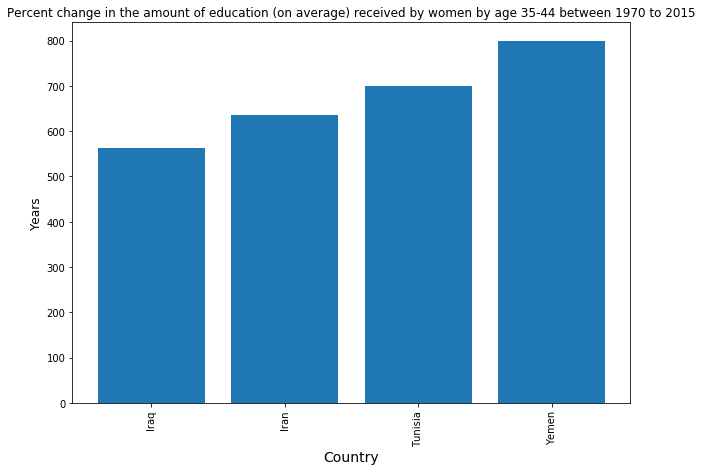

In [247]:
#visualize greatest increase in rate
country_bar_plot(school, 10, 7, 'level_rate', 'highest', 'rate', 'Years', 'Percent change in the amount of education (on average) received by women by age 35-44 between 1970 to 2015', rot_ticks= True)    

**United States and Canada are countriest where the education rate changed the least from 1970 to 2015 but they are already among the countriest with highest education rate. I don't expect the average to budge much more in the coming years because it would mean that more females were searching for post-graduate education (additional education follwoing a traditional 4 year college). With the changing economoy that may not be likely as education is becoming more expensive. Irag, Iran, Tunisia, and Yemen are making great strides when it comes to educating women. However, it is unclear if these women are technically citizens but are ex-pats and live elsewhere. SOmething to consider in future explorations**

### Research Question 3: What is the child mortality rate like in countries with highly educated women compared to those with uneducated women? 
> Do wealthier countries have more highly educated women?  
> Do wealthier countries have lower child mortality?  
> Do highly educated women have healthier babies/children?   



In [835]:
# plot wealth vs. female eduction
# plot wealth vs child mortality
#plot female eduction vs child mortality (where size of the pt indicates GDP of the country)

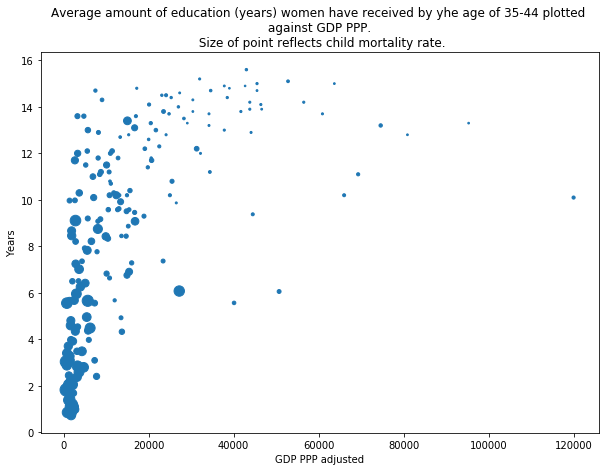

In [253]:
def country_scatter(figx, figy, df_x, df_y, area_df, scaling, xlabel, ylabel, title):
    plt.figure(figsize=(figx,figy))
    plt.scatter(df_x, df_y, s=area_df*scaling)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);
    
country_scatter(10,7, inc['2015'], school['2015'], M['2015'], 1.15,'GDP PPP adjusted',"Years",'Average amount of education (years) women have received by the age of 35-44 plotted \n against GDP PPP. \n Size of point reflects child mortality rate.')
    
   

**The above scatter plot indicates that GDP may not be the strongest predictor of average female education. For example, a high GDP does not guarantee high level of education as indicated by some of the data points in the high GDP range but average to low education range.**

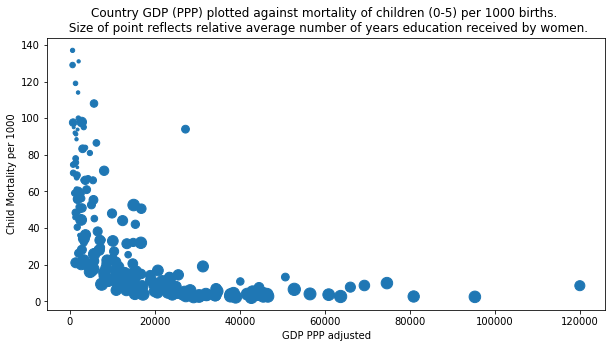

In [259]:
country_scatter(10,5, inc['2015'], M['2015'], school['2015'], 10,'GDP PPP adjusted',"Child Mortality per 1000",'Country GDP (PPP) plotted against mortality of children (0-5) per 1000 births. \n Size of point reflects relative average number of years education received by women.')


**As expected, there is some relationship between child mortality rate and GDP. Child mortality is generally lower in countries with higher GDP. However, the gradient showing female education may indicate that female education - even in poor countries - may also affect child mortality rate. Let's take a closer look below...**

In [865]:
#lets look at poor countries only
poor_countries = inc[inc['levels2015']== "lowest"]['country'].tolist()
poor_countries

['Afghanistan',
 'Burkina Faso',
 'Burundi',
 'Central African Republic',
 'Comoros',
 'Congo, Dem. Rep.',
 'Eritrea',
 'Ethiopia',
 'Gambia',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Kiribati',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mozambique',
 'Niger',
 'North Korea',
 'Rwanda',
 'Sierra Leone',
 'Somalia',
 'South Sudan',
 'Togo',
 'Uganda',
 'Zimbabwe']

In [ ]:
school_poor = school[school['country'].isin(poor_countries)]
M_poor = M[M['country'].isin(poor_countries)]

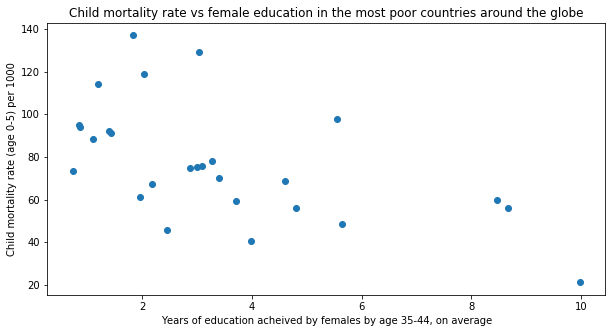

In [866]:

plt.figure(figsize=(10,5))
plt.scatter(school_poor['2015'], M_poor['2015'])
plt.xlabel('Years of education acheived by females by age 35-44, on average')
plt.ylabel('Child mortality rate (age 0-5) per 1000')
plt.title('Child mortality per 1000 vs female education in the most poor countries around the globe');

**The results here are encouraging. It's not just GDP that affects child mortality but level of education of mothers appears to also be correlated to child mortality. Child mortality of 10% (100/1000) is only associated with countries where mothers have 3 or less years of education by the time they reach 35. With an additional 3 more year on average, so 6 total, the child mortality rate is within the  6% - 7% (60 - 70 /1000) range which is a reduction by almost half.**

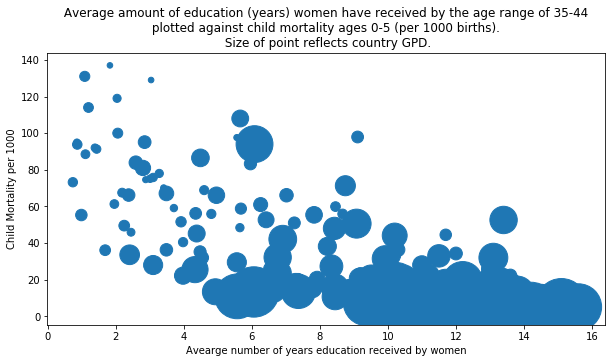

In [257]:
# finally, let's take a closer look at child mortality compared to female education. 
country_scatter(10,5, school['2015'], M['2015'], inc['2015'], 0.05,'Avearge number of years education received by women',"Child Mortality per 1000",' Average amount of education (years) women have received by the age range of 35-44 \n plotted against child mortality ages 0-5 (per 1000 births). \n Size of point reflects country GPD.')

**This plot depicts a correlation betwen education and child mortality, which we just saw above. Also, it highlights a very strong correlation between female education and GDP. The figure is overwhelmed by the bubble size (indicative of high GDP) where average female education reaches the upper limit (16).**


<a id='conclusions'></a>
## Conclusions

For this project I explored the Gapminder datasets. I specifically chose to explore GPD (PPP), child mortality rate, and female education levels around the globe. 

GDP around the globe is right skewed; the greatest mass occurs in the low end (most countries are very poor) and a select few countries have very high GDPs. A portion of these countries are oil rich countries (i.e. Qatar) with very low debt. Most of the poorest countries are those in Africa or the Middle East: regions with long records of war and civil unreast (e.g. Eritrea, Yemen, DOC, etc). 

Child mortality rate around the globe is also right skewed; many countries have very high mortality rates. Most of the high mortality rates are in very poor countries. However, there has been a large decrease in child mortality rate since 1970 which likely is a result of societal advancements (sanitation, access to health care, etc). 

Female education levels around the globe were generally related to GDP but the relationsip was not a strong as I first hypothesized. For example, average number of years educated in countries with a GDP PPP of only 20,000 was similar to that in countries with GDP closer to 100,000. After reading more about GDP PPP, it seems that it may not be the most accurate description of personal income. Also, the primary export of many countries with high GDP is oil and the wealth may not be distributed evenly between men and women. 

Another conclusion that I made was that, not surprisingly, children in wealthier countries fare better. But what is notable is that female education may also strongly predict child mortality rates. For example, among poor countries, countries with more educated women have healthier babies and children (lower child mortality). 

### Important Considerations and Limitations



These explorations were performed using data up to terminal year of 2015. It is likely these numbers have changed since then. Also, it may be more accurate to explore running averages of these values which better incorporate annual noise. Exploring a running average (say of the last 5 years) may better depict trends in GDP, female education, and child mortality rate. Further, using a moving average to making inferences about rate of change may be more accurate. 

To note, this analysis only covered years 1970 to 2015. The inferences made may be affected by length of timeseries. Also, there were 5 countries not accounted for in these analyses: Monaco, Nauru, Palau, San Marino, St. Kitts and Nevis, Tuvalu because some indicators were not available for these countries. In addition, information about Andorra for the earlier portion of the timeseries was inferred using imputation. 

Finally, because no statistical analyses were leveraged throughout this exploration the results can only be inferred in terms of possible correlation between each factor explored. They are qualitative findings not suppprted by inferential statistics. 